## first lets import the data

In [51]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

train_df = pd.read_csv("./data/fashion-mnist_train.csv")
test_df = pd.read_csv("./data/fashion-mnist_test.csv")
x_train =train_df.iloc[:, 1:]#divide the data to x_train,y_train
y_train=train_df.iloc[:, :1]
x_test =test_df.iloc[:, 1:]#divide the data to x_train,y_train
y_test=test_df.iloc[:, :1]
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [52]:
#lets look at the data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='label', ylabel='count'>

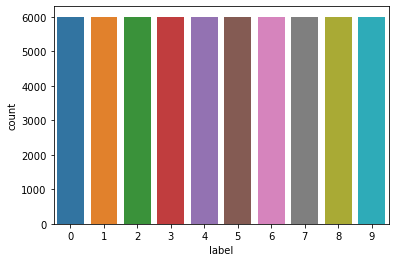

In [53]:
#sns.scatterplot(data=train_df,hue="label",palette="coolwarm_r")
#x_red.shape
# label_train=pd.DataFrame([train_df.iloc[:,0]]).T
# label_train.value_counts()
# g = sns.countplot(y_train.value_counts())
# y_train.value_counts()
#sns.countplot(y_train)
sns.countplot(x='label',data=y_train)

## lets try to visualize the images

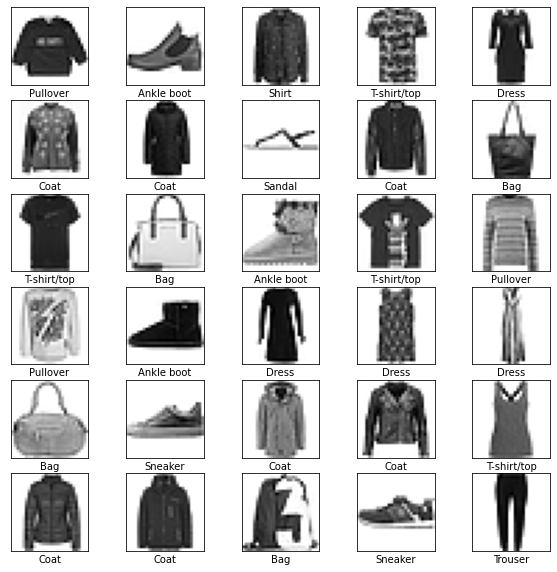

In [54]:
# Manually enter the meaningful name of each label
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(x_train.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[y_train.label.iloc[i]])

In [55]:
pca=PCA(n_components=0.95)
x_red=pca.fit_transform(x_train)
#y_red=pca.tranform(y_train)
x_red_inv=pca.inverse_transform(x_red)
x_test_red=pca.transform(x_test)

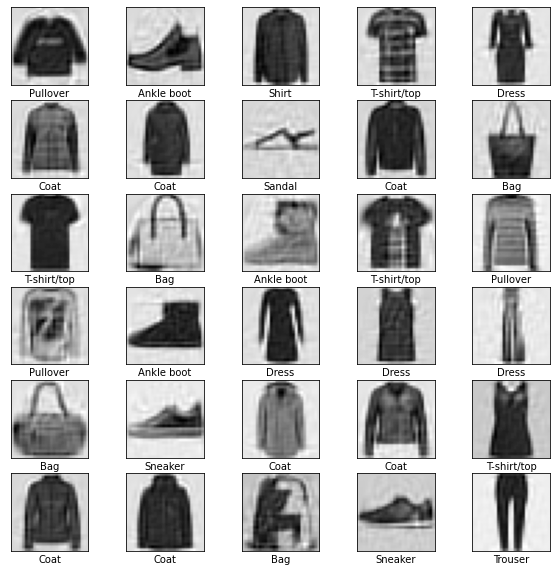

In [56]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(x_red_inv[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[y_train.label.iloc[i]])

Text(0.5, 0, '95% Variance Retained')

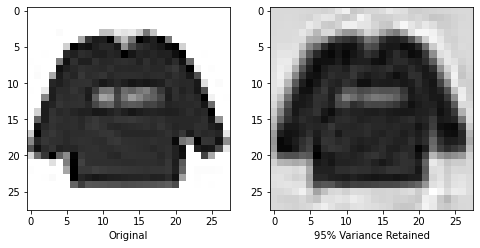

In [57]:
#lets show an original vs pca'ed one
# Set the figure size
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(np.array(x_train.iloc[0, :]).reshape(28,28), cmap=plt.cm.binary)
plt.xlabel("Original")
plt.subplot(1,2,2)
plt.imshow(np.array(x_red_inv[0]).reshape(28,28), cmap=plt.cm.binary)
plt.xlabel("95% Variance Retained")

In [ ]:
from sklearn.manifold import TSNE
pca_vis=PCA(n_components=3)
pca_result=pca.fit_transform(x_train)
train_df['pca-one'] = pca_result[:,0]
train_df['pca-two'] = pca_result[:,1] 
train_df['pca-three'] = pca_result[:,2]
tsne_results= TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(x_red)
train_df['tsne-2d-one'] = tsne_results[:,0]
train_df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=train_df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=train_df,
    legend="full",
    alpha=0.3,
    ax=ax2
)


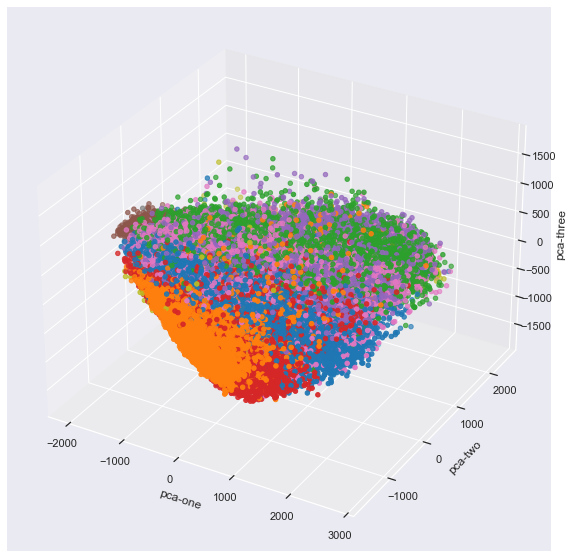

In [91]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=train_df["pca-one"], 
    ys=train_df["pca-two"], 
    zs=train_df["pca-three"], 
    c=train_df["label"], 
    cmap='tab10'
)
plt.legend(label)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [9]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
x_red=StandardScaler().fit_transform(x_red)
x_test_red=StandardScaler().fit_transform(x_test_red)
scores=dict()


In [10]:
# knn_grid={'n_neighbors':[1,3,5,8],'weights':['uniform','distance']}
# knn_gs=GridSearchCV(KNeighborsClassifier(),knn_grid,verbose=3,n_jobs=-1)
# gs_results =knn_gs.fit(x_red,y_train.values.ravel())

In [12]:
knn_clf=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_clf.fit(x_red,y_train.values.ravel())
y_pred=knn_clf.predict(x_test_red)
scores["KNN"]=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7587    0.8270    0.7914      1000
           1     0.9751    0.9780    0.9765      1000
           2     0.7998    0.7550    0.7767      1000
           3     0.8779    0.8700    0.8739      1000
           4     0.8215    0.7870    0.8039      1000
           5     0.9858    0.8330    0.9030      1000
           6     0.5842    0.6660    0.6224      1000
           7     0.8664    0.9400    0.9017      1000
           8     0.9878    0.8910    0.9369      1000
           9     0.9203    0.9590    0.9393      1000

    accuracy                         0.8506     10000
   macro avg     0.8578    0.8506    0.8526     10000
weighted avg     0.8578    0.8506    0.8526     10000



In [16]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_red,y_train.values.ravel())
y_pred=rf_clf.predict(x_test_red)
#scores.append({"Random Forest":accuracy_score(y_test,y_pred)})
scores["Random Forest"]=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7690    0.8520    0.8083      1000
           1     0.9917    0.9610    0.9761      1000
           2     0.7795    0.7990    0.7891      1000
           3     0.8848    0.8910    0.8879      1000
           4     0.7906    0.8380    0.8136      1000
           5     0.9256    0.9210    0.9233      1000
           6     0.7241    0.5720    0.6391      1000
           7     0.9051    0.8960    0.9005      1000
           8     0.9422    0.9620    0.9520      1000
           9     0.9111    0.9430    0.9268      1000

    accuracy                         0.8635     10000
   macro avg     0.8624    0.8635    0.8617     10000
weighted avg     0.8624    0.8635    0.8617     10000



In [14]:
xgb_clf=xgb.XGBClassifier(learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")
xgb_clf.fit(x_red,y_train.values.ravel())
y_pred=xgb_clf.predict(x_test_red)
scores["XGBoost"]=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8217    0.8480    0.8346      1000
           1     0.9959    0.9710    0.9833      1000
           2     0.8150    0.8020    0.8085      1000
           3     0.9083    0.9210    0.9146      1000
           4     0.8172    0.8450    0.8309      1000
           5     0.9622    0.9410    0.9515      1000
           6     0.7106    0.6850    0.6976      1000
           7     0.9270    0.9400    0.9335      1000
           8     0.9698    0.9630    0.9664      1000
           9     0.9437    0.9550    0.9493      1000

    accuracy                         0.8871     10000
   macro avg     0.8871    0.8871    0.8870     10000
weighted avg     0.8871    0.8871    0.8870     10000



In [15]:
ada_clf=AdaBoostClassifier(learning_rate=0.5,random_state=42)
ada_clf.fit(x_red,y_train.values.ravel())
y_pred=ada_clf.predict(x_test_red)
#scores.append({"ADABoost":accuracy_score(y_test,y_pred)})
scores["ADABoost"]=accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7222    0.6630    0.6913      1000
           1     0.8936    0.0840    0.1536      1000
           2     0.4130    0.6950    0.5181      1000
           3     0.4090    0.8810    0.5587      1000
           4     0.6612    0.2810    0.3944      1000
           5     0.5629    0.8010    0.6612      1000
           6     0.3764    0.1690    0.2333      1000
           7     0.7921    0.5640    0.6589      1000
           8     0.6953    0.9240    0.7935      1000
           9     0.8979    0.7300    0.8053      1000

    accuracy                         0.5792     10000
   macro avg     0.6424    0.5792    0.5468     10000
weighted avg     0.6424    0.5792    0.5468     10000



# so im about to fit and train the model using a pipeline with voting classifier
## weird note : i used KMEANS with n_clusters=10 , but it dropped the model to 66%,
## without it , the model is 88% ,but it did make it run faster

In [19]:
from sklearn.model_selection import cross_val_predict
pipe=Pipeline([("pca",PCA(n_components=0.95,random_state=42)),
                  ("scaler",StandardScaler())
                  ,('voting_clf', VotingClassifier(
        estimators=[
            ('lr', BaggingClassifier(LogisticRegression(multi_class='ovr',
                                                        max_iter=1000),
                                     n_estimators=5,
                                     n_jobs=-1)),
            ('xgb',xgb.XGBClassifier(learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")),
            ('rf', RandomForestClassifier())#,
            #('ada',AdaBoostClassifier(KNeighborsClassifier(n_neighbors=3,weights='distance'),learning_rate=0.5,algorithm='SAMME.R',random_state=42))
        ], voting='soft', n_jobs=-1))])
pipe.fit(x_train,y_train.values.ravel())

Pipeline(steps=[('pca', PCA(n_components=0.95, random_state=42)),
                ('scaler', StandardScaler()),
                ('voting_clf',
                 VotingClassifier(estimators=[('lr',
                                               BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                                                                   multi_class='ovr'),
                                                                 n_estimators=5,
                                                                 n_jobs=-1)),
                                              ('xgb',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                    

In [20]:
#sns.scatterplot(data=train_df,hue=y_kmeans_labels)
y_pred=pipe.predict(x_test)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8151    0.8510    0.8327      1000
           1     0.9908    0.9720    0.9813      1000
           2     0.8238    0.8090    0.8163      1000
           3     0.8920    0.9170    0.9043      1000
           4     0.8185    0.8570    0.8373      1000
           5     0.9639    0.9350    0.9492      1000
           6     0.7241    0.6560    0.6884      1000
           7     0.9223    0.9380    0.9301      1000
           8     0.9604    0.9690    0.9647      1000
           9     0.9400    0.9550    0.9474      1000

    accuracy                         0.8859     10000
   macro avg     0.8851    0.8859    0.8852     10000
weighted avg     0.8851    0.8859    0.8852     10000



In [ ]:

# xgb_clf=xgb.XGBClassifier(learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")
# xgb_clf.fit(x_red,y_train.values.ravel())

In [ ]:
# y_pred=xgb_clf.predict(x_test_red)
# print(classification_report(y_test, y_pred,digits=4))
# print(accuracy_score(y_test,y_pred))

In [21]:
scores

{'KNN': 0.8506, 'Random Forest': 0.8635, 'XGBoost': 0.8871, 'ADABoost': 0.5792}

In [ ]:
x_train.shape

In [ ]:
x_red.shape